# Lectrure 1

## Exercise 1.1

We want to test our pseudo-random number generator evaluating the following integral
$$ <r>=\int_{0}^{1}rdr \; \left(=\dfrac{1}{2}\right).$$
We make $10^4$ estimations of it, divided into 100 blocks of 100 estimations. For each block, we compute $<r>$ and its variance $<\sigma^2>$, then we average these values up to the $k^{th}$ block. The following plots are the result of this process.

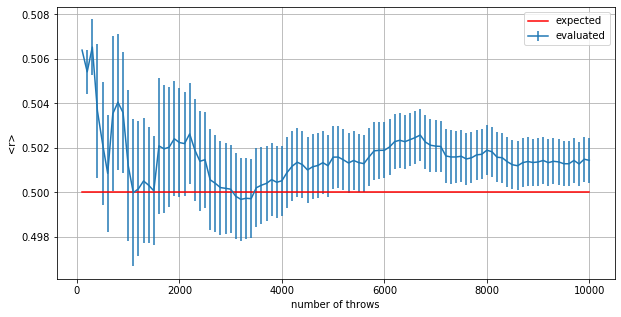

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x,y,error=np.loadtxt("es1.1/average.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(0.5)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel('<r>')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

The variance can be computed as
$$\sigma^2=\int_{0}^{1}(r-<r>)^2dr \; \left(=\dfrac{1}{12}\right)$$

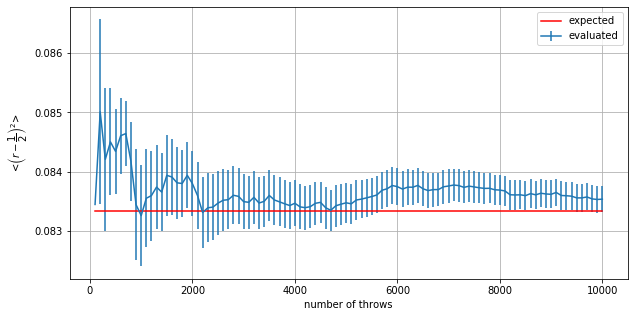

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x,y,error=np.loadtxt("es1.1/variance.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(1.0/12.0)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'<$\left(r-\dfrac{1}{2} \right)^2$>')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

Finally, we make a $\chi^2$ test on the generator. We divide $[0,1]$ into $m=100$ identical sub-inteval, we generate $n=10^4$ numbers and evaluate
$$\chi^2=\sum_{i=0}^{m}\dfrac{(n_i-n/m)^2}{n/m}$$
where $n_i$ are the numbers in the $i^{th}$ sub-interval. The test is repeated 100 times, obtaining the following plot

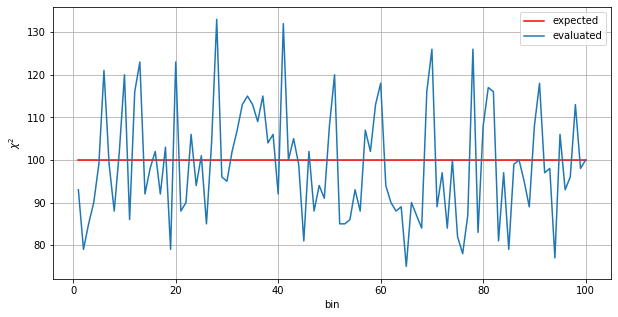

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x,chi2=np.loadtxt("es1.1/chi2.txt", usecols=(0,1), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(100)
plt.plot (x,expected,color='red',label='expected')
plt.errorbar(x,chi2,label='evaluated')
plt.xlabel('bin')
plt.ylabel('$\chi^2$')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

## Exercise 1.2

The **Central Limit Theorem (CLT)** states that, for N statistically indipendent and identically distributed random variables $x_i$, each one with the same mean $<x_i>=\mu$ and variance $<x_i^2>-<x_i>^2=\sigma^2$, their average $A_N=\frac{1}{N}\sum_{i=0}^{N}x_i$ has mean $A_N=\mu$, variance $\sigma_{A_N}^2=\frac{\sigma^2}{N}$ and, for $N\rightarrow\infty$, its distribution becomes a Gaussian with that mean and variance. We want to check the CLT with a uniform distribution, an exponential distribution and a Cauchy-Lorentz distribution for $N=1,2,10,100$. We draw $10^4$ numbers for every distribution.

#### Uniform distribution: integers in $[1,6]$

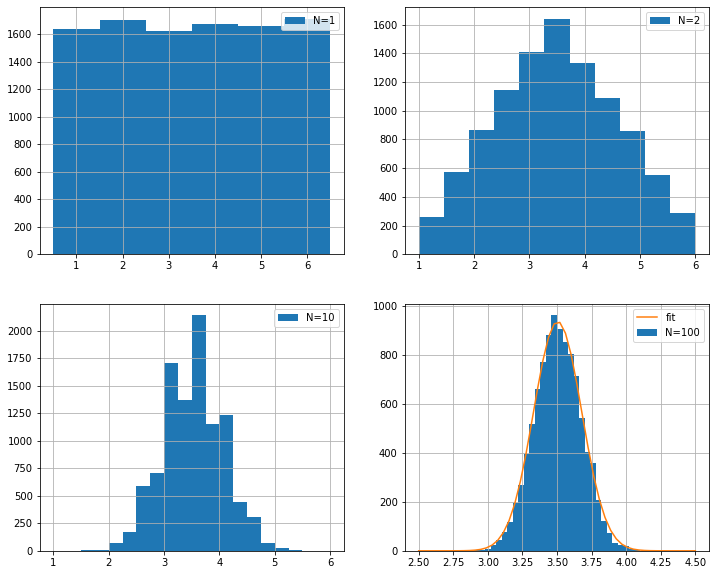

optimized parameters for N=100 [amp,mu,var]=
[9.36488028e+02 3.50470342e+00 3.03844772e-02]
parameters uncertainty=
[5.82606548e+00 1.25218475e-03 4.36540300e-04]


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def gauss (x,amp,mu,var) :    
    return amp*np.exp(-((x-mu)**2.0)/(2.0*var))
                    
Unif1,Unif2,Unif10,Unif100=np.loadtxt("es1.2/Uniform.txt", usecols=(1,2,3,4), delimiter=" ", unpack='true')
plt.figure(figsize=(12,10))

plt.subplot(221)
n,bins,patches=plt.hist(Unif1,6,range=(0.5,6.5),label='N=1')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(222)
n,bins,patches=plt.hist(Unif2,11,range=(1,6),label='N=2')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(223)
n,bins,patches=plt.hist(Unif10,20,range=(1,6),label='N=10')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(224)
n_bins=50
n,bins,patches=plt.hist(Unif100,50,range=(2.5,4.5),label='N=100')
x=np.linspace(2.5,4.5,n_bins)
p_opt,p_cov=curve_fit(gauss,x,n,bounds=([900,3.25,0],[1100,3.75,1]))
y_fit = gauss(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit,label='fit')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("optimized parameters for N=100 [amp,mu,var]=")
print(p_opt)
print("parameters uncertainty=")
print(np.sqrt(np.diagonal(p_cov)))

#### Exponential distribution: $\lambda e^{-\lambda x}$, $\lambda=1$

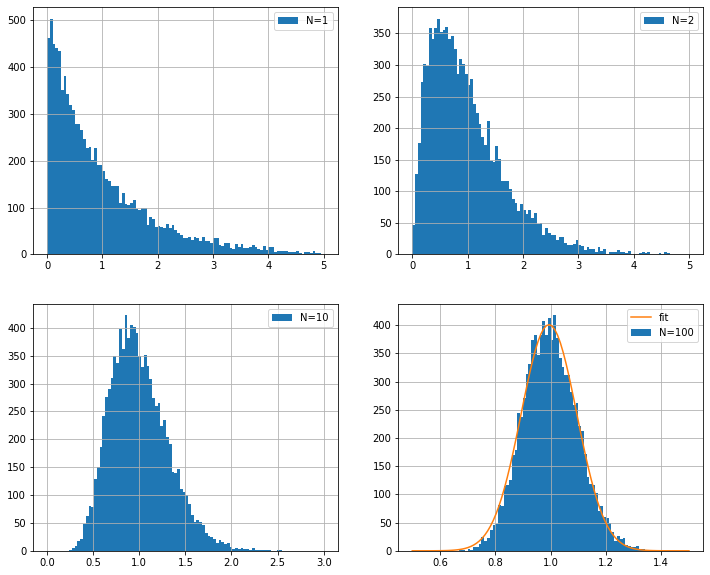

optimized parameters for N=100 [amp,mu,var]=
[4.00721993e+02 9.94064336e-01 1.00986090e-02]
parameters uncertainty =
[3.36790394e+00 9.75251765e-04 1.96009752e-04]


In [7]:
Exp1,Exp2,Exp10,Exp100=np.loadtxt("es1.2/Exponential.txt", usecols=(1,2,3,4), delimiter=" ", unpack='true')
n_bins=100
plt.figure(figsize=(12,10))

plt.subplot(221)
n,bins,patches=plt.hist(Exp1,n_bins,range=(0,5),label='N=1')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(222)
n,bins,patches=plt.hist(Exp2,n_bins,range=(0,5),label='N=2')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(223)
n,bins,patches=plt.hist(Exp10,n_bins,range=(0,3),label='N=10')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(224)
n,bins,patches=plt.hist(Exp100,n_bins,range=(0.5,1.5),label='N=100')
x=np.linspace(0.5,1.5,n_bins)
p_opt,p_cov=curve_fit(gauss,x,n,bounds=([0,0.75,0],[1100,1.25,1]))
y_fit = gauss(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit,label='fit')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("optimized parameters for N=100 [amp,mu,var]=")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

#### Cauchy-Lorentz distribution: $\dfrac{1}{\pi}\dfrac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $\mu=0$, $\Gamma=1$

There is a class of distributions (called $stable$ $distributions$) for wich the CLT doesn't applies: the Cauchy-Lorentz distribution belongs to this class.

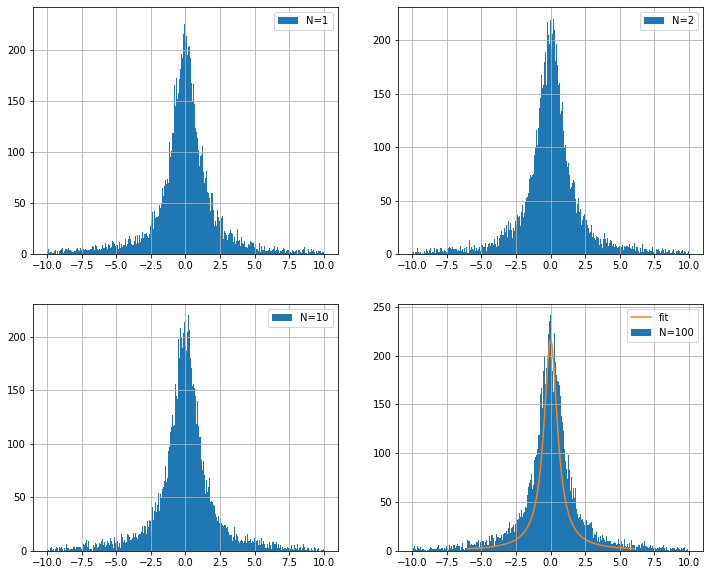

optimized parameters [amp,mu,gamma]=
[4.04421980e+02 5.72433449e-03 5.95978827e-01]
parameters uncertainty =
[3.33515897 0.004907   0.00695204]


In [8]:
def lorentz(x,amp,mu,gamma):
    return amp*(gamma/np.pi)/((x-mu)**2+gamma**2)

Cau1,Cau2,Cau10,Cau100=np.loadtxt("es1.2/Cauchy.txt", usecols=(1,2,3,4), delimiter=" ", unpack='true')
n_bins=300
plt.figure(figsize=(12,10))

plt.subplot(221)
n,bins,patches=plt.hist(Cau1,n_bins,range=(-10,10),label='N=1')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(222)
n,bins,patches=plt.hist(Cau2,n_bins,range=(-10,10),label='N=2')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(223)
n,bins,patches=plt.hist(Cau10,n_bins,range=(-10,10),label='N=10')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(224)
n,bins,patches=plt.hist(Cau100,n_bins,range=(-10,10),label='N=100')
x=np.linspace(-6,6,n_bins)
p_opt,p_cov=curve_fit(lorentz,x,n,bounds=([0,-1,0],[1000,1,1]))
y_fit = lorentz(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit,label='fit')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("optimized parameters [amp,mu,gamma]=")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

## Exercise 1.3: the Buffon's Experiment

A needle of lenght $L$ is thrown at random onto a horizontal plane ruled with straight a distance $d>L$ apart. The probability that a the needle will intersect one of these lines is $P=\frac{2L}{\pi d}$. We can use this to evaluate $\pi$ as
$$\pi=\dfrac{2L}{Pd}=\lim_{N_t\to\infty}\dfrac{2LN_t}{dN_h}$$
where $N_t$ is the number of throws and $N_h$ the times a needle hit land on a line.

The simulation consists of $10^4$ estimations, divided into 100 equal blocks. We use $d=1$ and $L=0,8$.

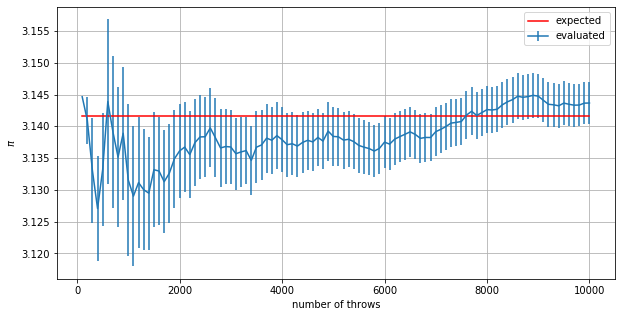

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x,y,error=np.loadtxt("es1.3/pi.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(np.pi)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel('$\pi$')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()